# Linear Regression

In [2]:
import numpy as np
import numpy.random as rnd
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

**Linear regression** is a supervised method.

\begin{equation}
 f: X \rightarrow y \nonumber
\end{equation}

## Data sets

In what follows we will use 2 data sets:

* a synthetic data set
* the Diabetes Data set from *Efron et al.* (2004)

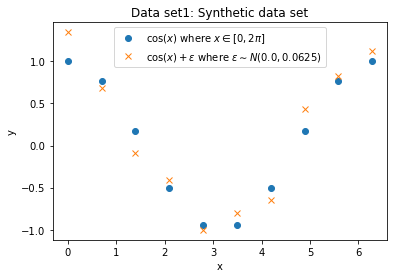

In [3]:
# DATA SET 1:               
MEAN=0.0
SD=0.25 # Sigma^2=0.0625
SZ=10
x=np.linspace(0.0, 2.0*np.pi, num=SZ)
rnd.seed(seed=2505) # To make data reproducible
noise=rnd.normal(loc=MEAN, scale=SD, size=SZ)
y1=np.cos(x) 
y=y1 + noise

plt.plot(x,y1,'o',label=r'$\cos(x)$ where $x \in [0,2\pi]$')
plt.plot(x,y,'x',label=r'$\cos(x)+\epsilon$ where $ \epsilon \sim N(0.0,0.0625)$ ')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title(r'Data set1: Synthetic data set')
plt.show()

## Optimization of a given model

Let's consider the following linear model:
\begin{eqnarray}
 Y_i & = & \sum_{i=0}^n X_i \, \beta_i \, + \, \epsilon_i \nonumber 
\end{eqnarray}

or in matrix form:
\begin{eqnarray}
 Y   & = & X\, \beta \, + \, \epsilon \nonumber 
\end{eqnarray}
where $X$ (design matrix) is an $n \times p$ matrix.
(In what follows, we assume that $n \ge p$).

This model can be optimized in several ways, e.g.:
* Least Squares Regression (LSQ)
* Gradient Descent
* Maximum Likelihood Estimation (MLE)

### Least Squares method

The LSQ approach does **not** require information on the data points' underlying distribution.<br>
Mathematically $\beta$ can be estimated by minimizing the following $L^2$ norm:
\begin{eqnarray}
   L(\beta) & = & |Y - X\beta|^2 \nonumber 
\end{eqnarray}

Thus, taking the matrix derivative $\frac{\partial L}{\partial \beta}$ leads to the so-called "normal" equations:
\begin{eqnarray}
 X^T \, X \,\widehat{\beta}& = & X^T\,Y \nonumber
\end{eqnarray}

If the regression/design matrix $X$ has rank $p$, then the matrix $X^TX$ is positive-definite and 
thus non-singular.

The estimate for $\beta$ i.e. $\widehat{\beta}$ is **unique** and thus given by:
\begin{eqnarray}
   \widehat{\beta} & = & (X^TX)^{-1}\,X^T \,Y \nonumber
\end{eqnarray}

The fitted values $\widehat{Y}$ are given by:
\begin{eqnarray}
   \widehat{Y} & = & X \,  \widehat{\beta} \nonumber
\end{eqnarray}

The residuals $e$ are given by:
\begin{eqnarray}
   e & = & Y\, - \, \widehat{Y}  \nonumber \\
     & = & Y\, - \, X \,  \widehat{\beta} \nonumber
\end{eqnarray}

The **residual sums of squares** (RSS) is thus:
\begin{eqnarray}
   e^T\,e &= & Y^TY \, - \, \widehat{\beta}^T  X^T X \widehat{\beta} \nonumber
\end{eqnarray}

The **mean square error** (MSE) is then given by:
\begin{eqnarray}
    \mathrm{MSE} & = & \frac{\mathrm{RSS}}{n} \nonumber
\end{eqnarray}

In [4]:
def genXmat(x,orderPoly,hasIntercept=True):
    """
    Create X matrix based on:
      orderPoly:: order of the polynomial
      hasIntercept :: presence of Intercept
    """
    start=0
    if hasIntercept==False:
        start=1
    return x[:,np.newaxis]**np.arange(start, orderPoly+1)

def calcBetaHat(Xmat,Y):
    """
    Calculate BetaHat
    """
    return la.inv(Xmat.T @ Xmat) @ Xmat.T @ Y

def calcYHat(Xmat,BetaHat):
    """regression
    Calculate YHat
    """
    return Xmat @ BetaHat

def calcResid(Y,YHat):
    """regression
    Calculate Residual
    """
    return Y - YHat


MAXORDER = x.shape[0]
print(f" Max. PolyOrder:{MAXORDER}")

lstIorder, lstRSS = [], []
lstBetaHat, lstYHat = [], []
for iorder in range(1, MAXORDER):
    
    Xmat = genXmat(x,iorder)
    BetaHat = calcBetaHat(Xmat,y)
    YHat = calcYHat(Xmat,BetaHat)
    Res = calcResid(y,YHat)
    RSS = np.sum(Res * Res)
    # Accumulate data
    lstIorder.append(iorder)
    lstBetaHat.append(BetaHat)
    lstYHat.append(YHat)
    lstRSS.append(RSS)  

 Max. PolyOrder:10


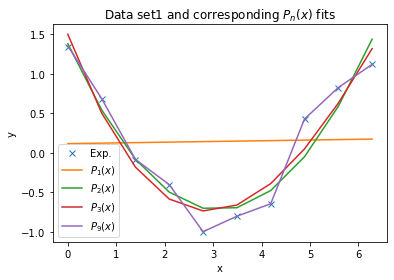

In [5]:
plt.title('Data set1 and corresponding ' + r'$P_n(x)$' + ' fits')
plt.plot(x, y, 'x', label=r'Exp.')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, lstYHat[0], label=r'$P_1(x)$')
plt.plot(x, lstYHat[1], label=r'$P_2(x)$')
plt.plot(x, lstYHat[2], label=r'$P_3(x)$')
plt.plot(x, lstYHat[8], label=r'$P_9(x)$')
plt.legend()
plt.show()

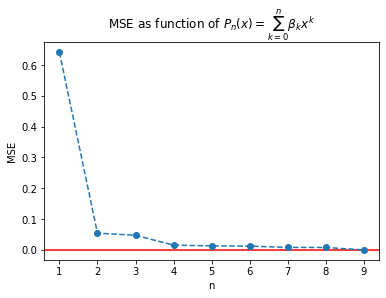

In [7]:
plt.axhline(y=0.0, color='r',linestyle='-')
plt.title('MSE as function of ' + r'$P_n(x)=\sum_{k=0}^n \beta_k x^k$')
plt.xlabel('n')
plt.ylabel('MSE')
plt.plot(np.array(lstIorder), np.array(lstRSS)/x.shape[0],'o--')
plt.show()

#### Ex.: $P_3(x)$ polynomial fit for data set 1


The cubic approximation is given by:
\begin{eqnarray}
 P_3(x) &:= & \displaystyle \sum_{k=0}^3 \beta_k \, x^k \nonumber \\
        & = &\beta_0 \, + \beta_1 \, x \, + \, \beta_2 \,x^2 \, + \, \beta_3 \, x^3 \nonumber
\end{eqnarray} 


In [16]:
print(f"Numerical values (data set1)::")
for i, item in enumerate(lstBetaHat[2]):
    print(f"  Beta_{i}: {item:12.8f}")

Numerical values (data set1)::
  Beta_0:   1.50131612
  Beta_1:  -1.66363662
  Beta_2:   0.34779480
  Beta_3:  -0.01394542


### Gradient Descent

The estimate for $\beta$ can also be found using gradient descent.

## Finding the optimal model

Issue of overfitting and underfitting.